# T-SNE PROJECTION

In [1]:
import time
import numpy as np
import pandas as pd

In [2]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

import numpy as np
import keras
import tensorflow as tf
import tensorboard
import matplotlib.pyplot as plt
import seaborn as sns

# import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

In [3]:

from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

df = pd.read_csv('fer112013.csv') 
x = df['pixels']
y = df['emotion']


In [4]:
# for creating the names for pixel columns after seperating into multiple columns
for _, first_row in df.iterrows():
    col_list = [f'pixel_col_{i+1}' for i in range(0, len(first_row['pixels'].split(' ')))]
    break
df[col_list] = np.nan

# this function is used to seperate different pixel values into different columns
def seperate_pixels(row):
    row[col_list] = row['pixels'].split(' ')
    return row

# using .apply to apply the function
df = df.apply(seperate_pixels, axis=1)


In [6]:
# redefining the x as pixel columns
x = df[col_list].copy()

In [7]:
col_list.append('emotion')

In [8]:
df[col_list].head()

,pixel_col_1,pixel_col_2,pixel_col_3,pixel_col_4,pixel_col_5,pixel_col_6,pixel_col_7,pixel_col_8,pixel_col_9,pixel_col_10,...,pixel_col_2296,pixel_col_2297,pixel_col_2298,pixel_col_2299,pixel_col_2300,pixel_col_2301,pixel_col_2302,pixel_col_2303,pixel_col_2304,emotion
0,254,254,254,254,254,249,255,160,2,58,...,92,99,84,22,0,0,42,129,180,0
1,156,184,198,202,204,207,210,212,213,214,...,199,197,193,188,184,180,172,167,161,1
2,69,118,61,60,96,121,103,87,103,88,...,93,92,90,92,93,92,88,87,90,4
3,205,203,236,157,83,158,120,116,94,86,...,211,213,206,196,181,112,43,82,86,6
4,87,79,74,66,74,96,77,80,80,84,...,32,33,35,38,40,45,41,34,32,3


In [9]:
print(x)

     pixel_col_1 pixel_col_2 pixel_col_3 pixel_col_4 pixel_col_5 pixel_col_6  \
0            254         254         254         254         254         249   
1            156         184         198         202         204         207   
2             69         118          61          60          96         121   
3            205         203         236         157          83         158   
4             87          79          74          66          74          96   
...          ...         ...         ...         ...         ...         ...   
1191          19          22          25          29          37          43   
1192         253         254         254         252         255         115   
1193         133         125         120          81         104         113   
1194         161         160         159         159         159         162   
1195          21          19          20          14          14           9   

     pixel_col_7 pixel_col_8 pixel_col_

In [10]:
print(df)
df["emotion"].value_counts()


      emotion                                             pixels Usage  \
0           0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...  Test   
1           1  156 184 198 202 204 207 210 212 213 214 215 21...  Test   
2           4  69 118 61 60 96 121 103 87 103 88 70 90 115 12...  Test   
3           6  205 203 236 157 83 158 120 116 94 86 155 180 2...  Test   
4           3  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...  Test   
...       ...                                                ...   ...   
1191        3  19 22 25 29 37 43 47 32 21 15 15 18 9 8 10 11 ...  Test   
1192        3  253 254 254 252 255 115 109 27 21 48 60 63 65 ...  Test   
1193        3  133 125 120 81 104 113 88 105 100 46 52 54 52 ...  Test   
1194        3  161 160 159 159 159 162 162 163 162 163 163 16...  Test   
1195        3  21 19 20 14 14 9 64 122 137 148 153 160 164 16...  Test   

     pixel_col_1 pixel_col_2 pixel_col_3 pixel_col_4 pixel_col_5 pixel_col_6  \
0            254         254   

3    300
6    206
4    202
2    170
0    165
5    134
1     19
Name: emotion, dtype: int64

In [11]:
from sklearn.decomposition import PCA
time_start = time.time()
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)
print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))


PCA done! Time elapsed: 1.7114310264587402 seconds


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1196 samples in 0.006s...
[t-SNE] Computed neighbors for 1196 samples in 0.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1196
[t-SNE] Computed conditional probabilities for sample 1196 / 1196
[t-SNE] Mean sigma: 745.296669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.792603
[t-SNE] KL divergence after 1000 iterations: 1.722019


[Text(0.5, 1.0, 'Facial data T-SNE projection')]

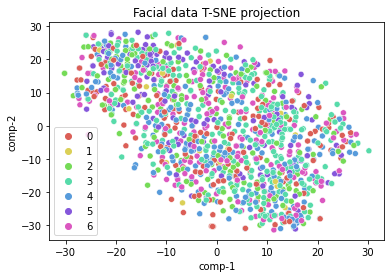

In [12]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 7),
                data=df).set(title="Facial data T-SNE projection")



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1196 samples in 0.004s...
[t-SNE] Computed neighbors for 1196 samples in 0.231s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1196
[t-SNE] Computed conditional probabilities for sample 1196 / 1196
[t-SNE] Mean sigma: 745.296669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.524200
[t-SNE] KL divergence after 1000 iterations: 1.736621


[Text(0.5, 1.0, 'Facial data T-SNE projection')]

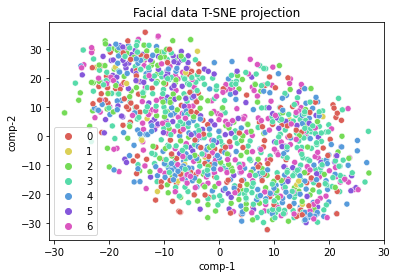

In [13]:
tsne = TSNE(n_components=2, verbose=1, random_state=1)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 7),
                data=df).set(title="Facial data T-SNE projection")

[Text(0.5, 1.0, 'Facial data T-SNE projection')]

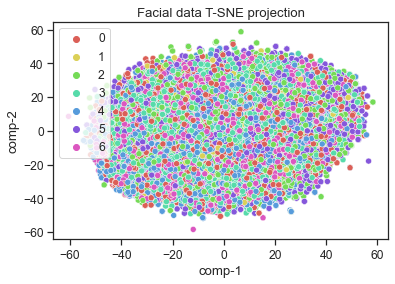

In [15]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 7),
                data=df).set(title="Facial data T-SNE projection",
                )
